In [6]:
#imports
import pickle
import pandas as pd
import numpy as np


In [11]:
#load apple_df_ML.pkl
apple_df_ML = pickle.load(open('apple_df_ML.pkl', 'rb'))
#drop index column
apple_df_ML.reset_index(drop=True, inplace=True)
apple_df_ML

#c

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,gain
0,178.235733,178.331486,178.289889,178.207933,178.179138,178.042583,177.873264,177.87247,177.994209,177.915357,...,0,0,0,0,0,0,0,0,0,True
1,181.904974,181.859539,181.845449,181.824149,181.843647,181.888155,181.881653,181.795025,181.824015,181.955434,...,0,0,0,0,0,0,0,0,0,False
2,179.322448,179.339692,179.324874,179.335482,179.35,179.340266,179.341157,179.349428,179.3425,179.334831,...,0,0,0,0,0,0,0,0,0,False
3,175.101076,175.155547,175.144149,175.103151,175.125732,175.107316,175.074358,175.068704,175.098636,175.133381,...,0,0,0,0,0,0,0,0,0,False
4,172.607027,172.646683,172.634637,172.639361,172.604653,172.581681,172.63577,172.670661,172.649364,172.650006,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,139.472937,139.666417,139.822981,139.750764,139.745796,139.693825,139.692225,139.734483,139.741705,139.668516,...,0,0,0,0,0,0,0,0,0,True
130,142.520165,142.862411,142.804697,142.754925,142.721403,142.798687,142.818407,142.80695,142.788154,142.738086,...,0,0,0,0,0,0,0,0,0,False
131,141.985858,142.114042,142.227377,142.180016,142.287812,142.215152,142.150874,142.102659,142.190929,142.238726,...,0,0,0,0,0,0,0,0,0,False
132,137.599456,137.384981,137.338305,137.509447,137.611533,137.661783,137.519065,137.529016,137.489386,137.530165,...,0,0,0,0,0,0,0,0,0,True


In [12]:
# function drops any rows with more than 40% 0 values
def drop_rows_with_many_zeros(df):
    counts =(df==0).astype(int).sum(axis=1)
    df = df[counts < len(df.columns)*0.4]
    return df

# function that replaces any nan values with the last non-nan value
def replace_nan_with_last_non_nan(df):
    for row_indx in range(len(df)):
        last_non_nan_value = df.iloc[row_indx,0]
        for col_indx, val in enumerate(df.iloc[row_indx,:]):
            if not pd.notna(val):
                df.iloc[row_indx,col_indx] = last_non_nan_value
            else:
                last_non_nan_value = val
    return df

In [ ]:
#apple_df_ML.head(143)

In [13]:
#only keep values that are not equal to 0 except for the 'gain' column
nan_value = float('NaN')

#replace all 0s with NaN
apple_df_ML.replace(0, nan_value, inplace=True)

#drop rows with more than 40% 0 values
apple_df_ML = drop_rows_with_many_zeros(apple_df_ML)

#replace nan values with the last non-nan value
apple_df_ML = replace_nan_with_last_non_nan(apple_df_ML)


# for the 'gain' column, replace all True with 1 and all False with 0
apple_df_ML.replace(True, 1, inplace=True)
apple_df_ML.replace(False, 0, inplace=True)

#find columns with all NaN values and drop them
#apple_df_ML.dropna(axis=1, how='any', inplace=True)

# replace remove any rows with all NaN values
#apple_df_ML.dropna(axis=0,how='all', inplace=True)

#print head of apple_df_ML
apple_df_ML.head(100)

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,gain
0,178.235733,178.331486,178.289889,178.207933,178.179138,178.042583,177.873264,177.872470,177.994209,177.915357,...,181.908692,181.908692,181.908692,181.908692,181.908692,181.908692,181.908692,181.908692,181.908692,1
1,181.904974,181.859539,181.845449,181.824149,181.843647,181.888155,181.881653,181.795025,181.824015,181.955434,...,179.348142,179.348142,179.348142,179.348142,179.348142,179.348142,179.348142,179.348142,179.348142,0
2,179.322448,179.339692,179.324874,179.335482,179.350000,179.340266,179.341157,179.349428,179.342500,179.334831,...,175.056958,175.056958,175.056958,175.056958,175.056958,175.056958,175.056958,175.056958,175.056958,0
3,175.101076,175.155547,175.144149,175.103151,175.125732,175.107316,175.074358,175.068704,175.098636,175.133381,...,172.599421,172.599421,172.599421,172.599421,172.599421,172.599421,172.599421,172.599421,172.599421,0
4,172.607027,172.646683,172.634637,172.639361,172.604653,172.581681,172.635770,172.670661,172.649364,172.650006,...,172.016293,172.016293,172.016293,172.016293,172.016293,172.016293,172.016293,172.016293,172.016293,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,164.853059,165.014763,165.003658,164.873748,164.754005,164.737659,164.731361,164.747486,164.707343,164.751762,...,157.867800,157.867800,157.867800,157.867800,157.867800,157.867800,157.867800,157.867800,157.867800,0
96,156.535111,156.457314,156.356886,156.207510,156.367656,156.473357,156.498561,156.586049,156.822734,156.647126,...,157.093343,157.093343,157.093343,157.093343,157.093343,157.093343,157.093343,157.093343,157.093343,1
97,155.346022,155.193476,155.042696,155.082340,154.921105,154.911048,154.896108,154.872544,155.001319,155.169645,...,152.716480,152.716480,152.716480,152.716480,152.716480,152.716480,152.716480,152.716480,152.716480,0
98,153.936491,153.936005,153.961686,153.938927,153.988599,153.891193,154.004760,154.095750,154.206560,154.202911,...,154.445495,154.445495,154.445495,154.445495,154.445495,154.445495,154.445495,154.445495,154.445495,1


In [10]:
apple_df_ML

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,gain
0,178.235733,178.331486,178.289889,178.207933,178.179138,178.042583,177.873264,177.872470,177.994209,177.915357,...,181.908692,181.908692,181.908692,181.908692,181.908692,181.908692,181.908692,181.908692,181.908692,True
1,181.904974,181.859539,181.845449,181.824149,181.843647,181.888155,181.881653,181.795025,181.824015,181.955434,...,179.348142,179.348142,179.348142,179.348142,179.348142,179.348142,179.348142,179.348142,179.348142,False
2,179.322448,179.339692,179.324874,179.335482,179.350000,179.340266,179.341157,179.349428,179.342500,179.334831,...,175.056958,175.056958,175.056958,175.056958,175.056958,175.056958,175.056958,175.056958,175.056958,False
3,175.101076,175.155547,175.144149,175.103151,175.125732,175.107316,175.074358,175.068704,175.098636,175.133381,...,172.599421,172.599421,172.599421,172.599421,172.599421,172.599421,172.599421,172.599421,172.599421,False
4,172.607027,172.646683,172.634637,172.639361,172.604653,172.581681,172.635770,172.670661,172.649364,172.650006,...,172.016293,172.016293,172.016293,172.016293,172.016293,172.016293,172.016293,172.016293,172.016293,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,139.472937,139.666417,139.822981,139.750764,139.745796,139.693825,139.692225,139.734483,139.741705,139.668516,...,141.733942,141.733942,141.733942,141.733942,141.733942,141.733942,141.733942,141.733942,141.733942,True
130,142.520165,142.862411,142.804697,142.754925,142.721403,142.798687,142.818407,142.806950,142.788154,142.738086,...,141.962864,141.962864,141.962864,141.962864,141.962864,141.962864,141.962864,141.962864,141.962864,False
131,141.985858,142.114042,142.227377,142.180016,142.287812,142.215152,142.150874,142.102659,142.190929,142.238726,...,137.692851,137.692851,137.692851,137.692851,137.692851,137.692851,137.692851,137.692851,137.692851,False
132,137.599456,137.384981,137.338305,137.509447,137.611533,137.661783,137.519065,137.529016,137.489386,137.530165,...,139.159956,139.159956,139.159956,139.159956,139.159956,139.159956,139.159956,139.159956,139.159956,True


In [14]:
X = apple_df_ML.drop('gain', axis=1).values
y = apple_df_ML['gain'].values
X

array([[178.235733, 178.331486, 178.289889, ..., 181.908692, 181.908692,
        181.908692],
       [181.904974, 181.859539, 181.845449, ..., 179.348142, 179.348142,
        179.348142],
       [179.322448, 179.339692, 179.324874, ..., 175.056958, 175.056958,
        175.056958],
       ...,
       [141.985858, 142.114042, 142.227377, ..., 137.692851, 137.692851,
        137.692851],
       [137.599456, 137.384981, 137.338305, ..., 139.159956, 139.159956,
        139.159956],
       [137.627544, 137.508483, 137.48028 , ..., 136.938091, 136.938091,
        136.938091]])

In [15]:
# import the necessary modules
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(X_train)

MinMaxScaler()

In [22]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
!TF_ENABLE_ONEDNN_OPTS=0
!CUDA_VISIBLE_DEVICES=0
!TF_ENABLE_ONEDNN_OPTS=0

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

2022-07-24 14:43:14.973605: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-24 14:43:14.973623: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [24]:
model = Sequential()

#model.add(Dense(units=1000, activation='relu'))

model.add(Dense(units=500, activation='relu'))

model.add(Dense(units=250, activation='relu'))

#model.add(Dense(units=125, activation='relu'))

#model.add(Dense(units=50, activation='relu'))

model.add(Dense(units=25, activation='relu'))

model.add(Dense(units=10, activation='relu'))

model.add(Dense(units=4, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

#binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam')


2022-07-24 14:43:20.228938: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-24 14:43:20.229201: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-24 14:43:20.229258: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-24 14:43:20.229301: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-24 14:43:20.229351: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [25]:
#train the model
model.fit(X_train, y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test), verbose=1)

Epoch 1/25
1/1 [==============================] - 1s 629ms/step - loss: 0.7084 - val_loss: 0.6948
Epoch 2/25
1/1 [==============================] - 0s 21ms/step - loss: 0.6934 - val_loss: 0.7176
Epoch 3/25
1/1 [==============================] - 0s 22ms/step - loss: 0.7127 - val_loss: 0.6951
Epoch 4/25
1/1 [==============================] - 0s 21ms/step - loss: 0.6967 - val_loss: 0.6948
Epoch 5/25
1/1 [==============================] - 0s 23ms/step - loss: 0.6953 - val_loss: 0.6932
Epoch 6/25
1/1 [==============================] - 0s 24ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 7/25
1/1 [==============================] - 0s 23ms/step - loss: 0.6932 - val_loss: 0.6933
Epoch 8/25
1/1 [==============================] - 0s 23ms/step - loss: 0.6932 - val_loss: 0.6933
Epoch 9/25
1/1 [==============================] - 0s 24ms/step - loss: 0.6932 - val_loss: 0.6933
Epoch 10/25
1/1 [==============================] - 0s 22ms/step - loss: 0.6932 - val_loss: 0.6933
Epoch 11/25
1/1 [===========

<AxesSubplot:>

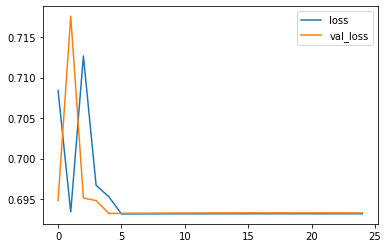

In [26]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()